# Mini Project: Trees and Forests

In this mini-project you'll be introduced to some fundamental concepts in machine learning: **Decision Trees**, **Random Forests**, **Boosting**, and **Bagging**. These techniques play a crucial role in building powerful and versatile machine learning models that can be applied to a wide range of tasks, from classification to regression.

## Decision Trees

Decision Trees are intuitive models that mimic human decision-making processes. Just like answering a series of questions to reach a conclusion, decision trees segment data based on a sequence of if-else questions. They partition the feature space into regions and assign a label to each region. Decision trees are particularly helpful in understanding the decision-making process behind predictions.

## Random Forests

Random Forests are an ensemble method that combines multiple decision trees to create a more robust and accurate model. Each tree in a random forest is trained on a random subset of the data with replacement (bootstrapping), and these trees are allowed to make individual predictions. The final prediction is determined through majority voting (classification) or averaging (regression) of the predictions made by the individual trees. Random Forests are known for their ability to handle noisy data, reduce overfitting, and capture complex relationships.

## Bagging: Bootstrap Aggregating

Bagging, short for Bootstrap Aggregating, is the technique behind Random Forests. It involves training multiple models on bootstrapped subsets of the training data. Bagging reduces the variance of the model by averaging out the noise and errors present in individual models. While Random Forests are a specific application of bagging to decision trees, bagging can also be applied to other base models.

## Boosting

Boosting is another ensemble technique that focuses on building a strong predictor by sequentially training multiple weak learners (often shallow decision trees). Boosting assigns weights to training instances, focusing more on those that the previous models misclassified. This iterative process helps the model correct its mistakes and improve its performance over time. Popular boosting algorithms include AdaBoost, Gradient Boosting, and XGBoost.

In this mini-project, we will:

1. Implement and visualize decision trees using the scikit-learn library.
2. Explore the power of random forests and understand feature importance.
3. Dive into the boosting technique with AdaBoost to enhance model accuracy.

For this mini-project we'll be using the [Breast Cancer Wisconsin (Diagnostic) dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html). First, let's import all the libraries we'll be using.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score

Here are your tasks:

1. Use [load_breast_cancer](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html) to load the Breast Cancer Wisconsin dataset as a Pandas dataframe.
2. Split the dataset into training and test sets.
3. Display the first five rows of data and make sure everything looks ok. You should have already explored the data a bit in the logistic regression mini-project so there's no need to conduct further EDA.  

In [4]:
# Load the Breast Cancer Wisconsin dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns = data.feature_names)
y = pd.Series(data.target)

print(X.head())
print(y.value_counts())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0           

In [7]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1342, stratify = y)

In [8]:
# Display first 5 rows
print(X_train.head())
print(y_train.value_counts())

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
542        14.74         25.42           94.70      668.6          0.08275   
402        12.96         18.29           84.18      525.2          0.07351   
94         15.06         19.83          100.30      705.6          0.10390   
368        21.71         17.25          140.90     1546.0          0.09384   
272        21.75         20.99          147.30     1491.0          0.09401   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
542           0.07214         0.04105              0.03027         0.1840   
402           0.07899         0.04057              0.01883         0.1874   
94            0.15530         0.17000              0.08815         0.1855   
368           0.08562         0.11680              0.08465         0.1717   
272           0.19610         0.21950              0.10880         0.1721   

     mean fractal dimension  ...  worst radius  worst texture  \
542

Let's start by diving into decision trees. At a high level, decision trees are a machine learning algorithm used for both classification and regression tasks. They model decisions and decision-making processes by breaking down a complex decision into a sequence of simpler decisions or questions. Each decision leads to one of several possible outcomes, eventually leading to a prediction or classification.

**Decision trees are built out of the following components:**
- **Nodes:** Decision trees consist of nodes. The initial node is the root node, and the final nodes are called leaf nodes.
- **Edges:** Edges connect nodes and represent the decision outcomes.
- **Attributes/Features:** Each node involves a decision based on a specific attribute or feature.
- **Splitting:** At each node, the dataset is partitioned into subsets based on an attribute's values.
- **Leaf Nodes:** These nodes represent the final predicted class or value.

**How Decision Trees Work:**
1. **Selecting the Best Feature:** Decision trees start with the root node and select the feature that best separates the data.
2. **Splitting:** The selected feature is used to split the data into subsets at each internal node.
3. **Repeating:** The process continues recursively for each subset, selecting the best feature at each node.
4. **Leaf Nodes:** The process stops when a certain stopping criterion is met, or when all instances at a node belong to the same class.

**Advantages:**
1. **Interpretability:** Decision trees are easy to understand and interpret. The path from the root to a leaf node can be visualized as a sequence of decisions.
2. **Handles Numerical and Categorical Data:** Decision trees can handle both numerical and categorical data, making them versatile.
3. **Non-Linearity:** They can capture non-linear relationships between features and the target variable.
4. **Feature Importance:** Decision trees provide a measure of feature importance, helping in feature selection.

**Challenges and Considerations:**
1. **Overfitting:** Decision trees can create overly complex models that fit the training data too closely, leading to poor generalization.
2. **Instability:** Small changes in the data can lead to different trees, which can make the model unstable.
3. **Bias towards Majority Class:** In classification tasks, decision trees tend to favor the majority class if classes are imbalanced.

**Improvements:**
1. **Pruning:** Pruning is the process of removing branches that do not improve the model's performance on validation data, reducing overfitting.
2. **Ensemble Methods:** Random Forests and Gradient Boosting Trees are ensemble methods that combine multiple decision trees to improve performance.

There are a number of different metrics used to determine how to split a node in a decision tree. The Gini impurity is a popular criterion used in decision tree algorithms. It measures the degree of impurity in a dataset, where lower values indicate more pure subsets of data. In the context of decision trees, the Gini impurity is used to assess how often a randomly chosen element would be misclassified if it were randomly assigned to a class based on the distribution of class labels in a subset. The Gini impurity ranges between 0 (pure node, all instances belong to a single class) and 0.5 (impure node, instances are evenly distributed across classes).

Here are your tasks:

1. Use Scikit-Learn's [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) to fit a model on the training data.
2. Visualize the resulting tree using [plot_tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html).
3. Iterate on the first two steps by trying different inputs to the decision tree classifier. What happens if you change the max depth? How about the maximum number of lead nodes? From the visualization, make sure you're able to understand how to descend the decision tree to arrive at a prediction.

In [9]:
# Create a Decision Tree model
tree_model = DecisionTreeClassifier(random_state = 1342)
tree_model.fit(X_train, y_train)        

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,1342
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


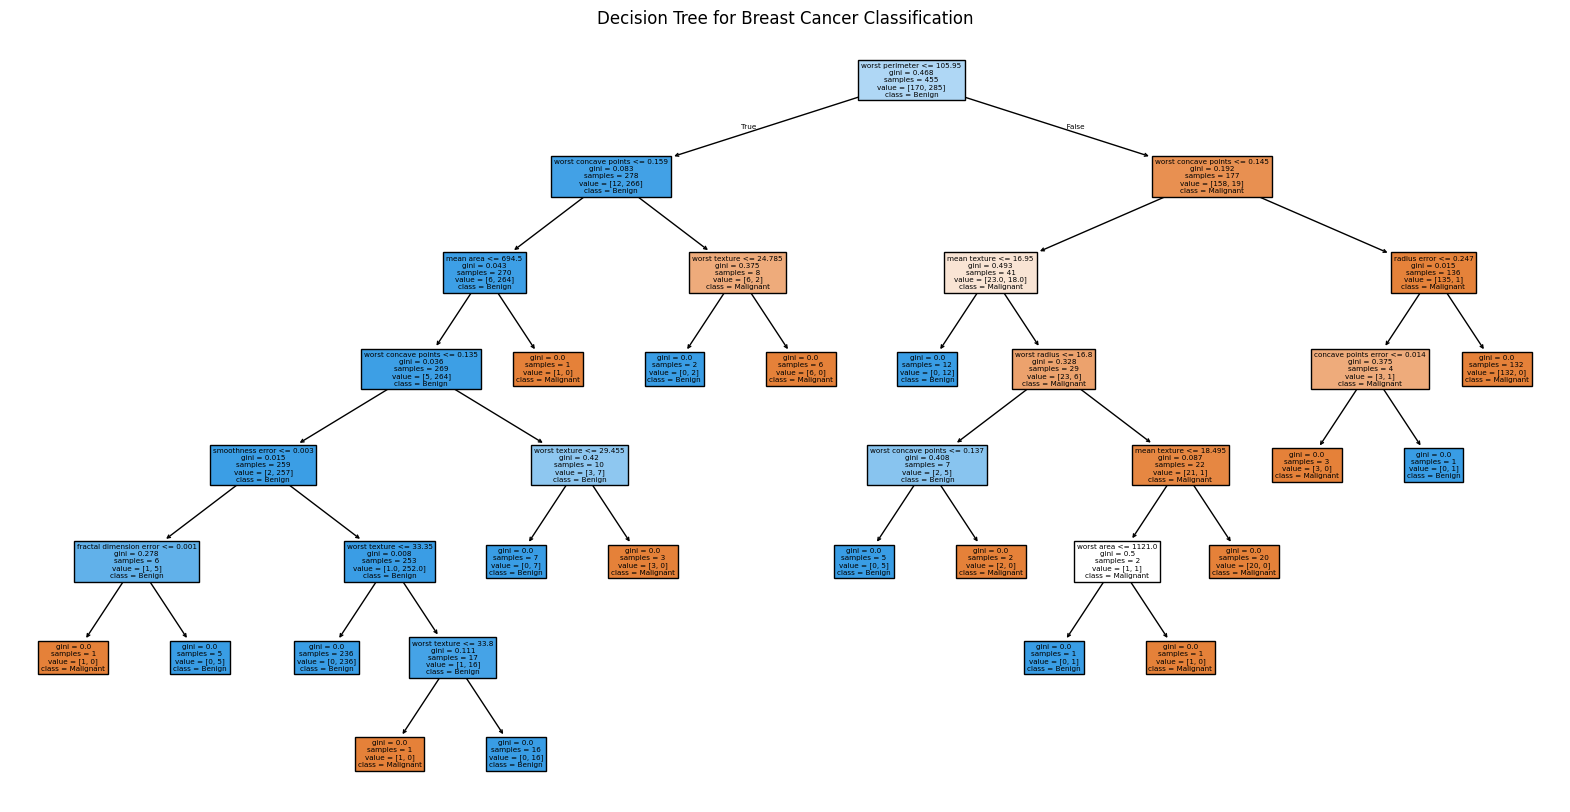

In [10]:
# Visualize the Decision Tree
plt.figure(figsize=(20,10))
plot_tree(tree_model, filled=True, feature_names=X.columns, class_names=['Malignant', 'Benign'])
plt.title("Decision Tree for Breast Cancer Classification")
plt.show()

In [15]:
# Evaluate tree model on test data
test_predictions_tree = tree_model.predict(X_test)
tree_accuracy = accuracy_score(y_test, test_predictions_tree)
print(f"Decision Tree Test Accuracy: {tree_accuracy:.4f}")

print(1- abs(y_test - test_predictions_tree).sum()/len(y_test))

Decision Tree Test Accuracy: 0.9035
0.9035087719298246


Random Forests are an extension of decision trees that leverage the power of ensemble learning to improve predictive accuracy and robustness. Instead of relying on a single decision tree, Random Forests combine multiple decision trees to make more accurate and stable predictions. Let's walk through the steps of going from decision trees to Random Forests:

**Step 1: Building Individual Decision Trees**
1. **Decision Tree Construction:** Start by building multiple individual decision trees. Each tree is trained on a bootstrapped subset of the training data, meaning that each tree sees a slightly different version of the data due to random sampling with replacement.
2. **Feature Selection:** At each node of a decision tree, only a random subset of features is considered for splitting. This introduces randomness and diversity among the trees.

**Step 2: Combining Trees in a Random Forest**
1. **Predictions:** When you need to make a prediction using the Random Forest, each individual tree in the forest makes a prediction.
2. **Majority Voting (Classification) or Averaging (Regression):** In the case of classification, the class that the majority of trees predict becomes the final prediction. In the case of regression, the average of predictions from all trees is taken as the final prediction.

**Benefits of Random Forests:**
1. **Reduced Overfitting:** The ensemble nature of Random Forests helps reduce overfitting. The diversity among the trees reduces the risk of capturing noise in the data.
2. **Feature Importance:** Random Forests can provide an estimate of feature importance by tracking how much each feature contributes to improving the purity of the nodes.
3. **Handles Noisy Data:** Random Forests can handle noisy and irrelevant features more effectively than individual decision trees.
4. **Parallelization:** Training decision trees can be parallelized since they are independent of each other, which speeds up the training process.

Here are your tasks:

1. Use your training data to train a Random Forest using [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html).
2. Extract the feature importances from the trained model.
3. Print the feature importances from largest to smallest.

In [40]:
# Train random forest model
random_forest_model = RandomForestClassifier(random_state=1342, n_estimators=100)
random_forest_model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [41]:
# Evaluate the random forest model on test data
test_predictions_rf = random_forest_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, test_predictions_rf)
print(f"Random Forest Test Accuracy: {rf_accuracy:.4f}")
print(1 - abs(y_test - test_predictions_rf).sum() / len(y_test))    

Random Forest Test Accuracy: 0.9474
0.9473684210526316


In [42]:
# Extract feature importances
feature_importances = random_forest_model.feature_importances_
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

In [43]:
# Print feature importance
print(importance_df)

                    Feature  Importance
7       mean concave points    0.145790
20             worst radius    0.135226
22          worst perimeter    0.129682
27     worst concave points    0.094893
23               worst area    0.071412
13               area error    0.065749
2            mean perimeter    0.060717
3                 mean area    0.044167
6            mean concavity    0.038273
0               mean radius    0.036295
26          worst concavity    0.025393
12          perimeter error    0.024435
1              mean texture    0.017441
21            worst texture    0.015443
10             radius error    0.015378
16          concavity error    0.010020
28           worst symmetry    0.007985
25        worst compactness    0.007375
24         worst smoothness    0.007131
5          mean compactness    0.006781
4           mean smoothness    0.005418
11            texture error    0.005324
17     concave points error    0.004755
15        compactness error    0.004151


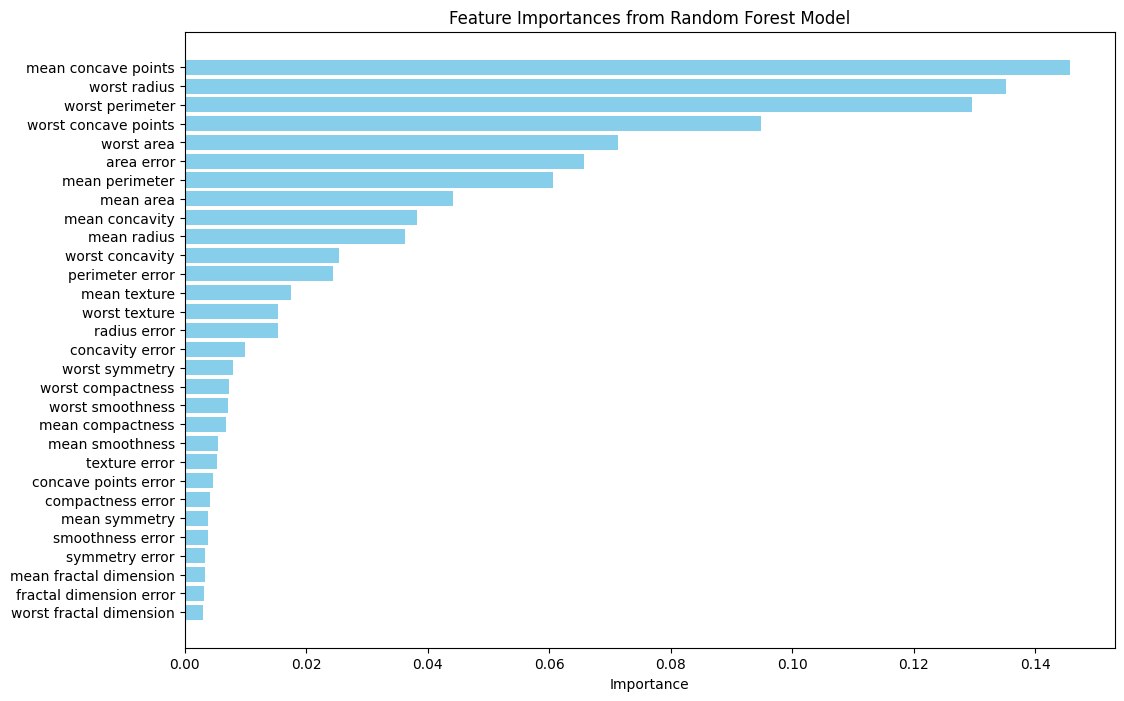

In [44]:
# Plot feature importances
plt.figure(figsize=(12, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances from Random Forest Model')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important features on top
plt.show()

AdaBoost, short for Adaptive Boosting, is a powerful ensemble learning technique used primarily for classification tasks. It is designed to enhance the performance of weak learners (typically shallow decision trees) by combining their predictions. AdaBoost focuses on learning from the mistakes of previous models and gives more weight to misclassified instances, allowing subsequent models to correct those mistakes.

Here's an overview of how AdaBoost works:

**Step 1: Building Weak Learners (Base Models)**
1. **Initialization:** Each training instance is initially assigned equal weights.
2. **Training Weak Learners:** A series of weak learners (e.g., shallow decision trees) are trained on the data. Each weak learner tries to minimize the weighted classification error, where the weight of an instance depends on its previous misclassifications. The first weak learner is trained on the original data.

**Step 2: Weighting Instances**
1. **Calculating Error:** The weighted classification error of each weak learner is computed as the sum of weights of misclassified instances.
2. **Updating Weights:** Instances that were misclassified by the previous weak learner are given higher weights, making them more important for subsequent models. Instances that were correctly classified are given lower weights.

**Step 3: Combining Weak Learners**
1. **Predictions and Voting:** The predictions from all weak learners are combined using weighted majority voting. Weights are assigned to each weak learner based on its performance (lower error leads to higher weight).
2. **Final Prediction:** The final prediction is made by taking a weighted majority vote of the weak learners' predictions.

**Benefits of AdaBoost:**
1. **Adaptive Learning:** AdaBoost focuses on instances that were misclassified by previous models, adapting to the complexity of the data.
2. **Improves Weak Models:** Even if individual weak learners perform only slightly better than random guessing, AdaBoost can combine them to create a strong model.
3. **Reduces Overfitting:** The iterative nature of AdaBoost allows it to focus on hard-to-classify instances and improve overall generalization.

Here are your tasks:

1. Build and train an [AdaBoostClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html) on your training data using a decision tree of max depth equal to 1 as your weak learner.
2. Evaluate your decision tree, random forest, and AdaBoost models by applying [accuracy_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) to the test data. Which model performs the best? Experiment by changing the hyperparameters of these models.


In [45]:
# Build and train an AdaBoostClassifier on your training data.
ada_model = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=2), n_estimators=100, random_state=1342)
ada_model.fit(X_train, y_train)

,estimator,DecisionTreeC...r(max_depth=2)
,n_estimators,100
,learning_rate,1.0
,algorithm,'deprecated'
,random_state,1342
,criterion,'gini'
,splitter,'best'
,max_depth,2
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0


In [46]:
# Evaluate AdaBoost model on test data
test_predictions_ada = ada_model.predict(X_test)
ada_accuracy = accuracy_score(y_test, test_predictions_ada)
print(f"AdaBoost Test Accuracy: {ada_accuracy:.4f}")
print(1 - abs(y_test - test_predictions_ada).sum() / len(y_test))

AdaBoost Test Accuracy: 0.9649
0.9649122807017544


In [47]:
importances = ada_model.feature_importances_

# Create a Series for easier viewing and sorting
feature_importances_series = pd.Series(importances, index=X.columns)

# Sort the importances for better visualization
sorted_importances = feature_importances_series.sort_values(ascending=True)

print(sorted_importances)

mean radius                0.003644
worst radius               0.004586
concave points error       0.005116
mean perimeter             0.010287
concavity error            0.011090
worst fractal dimension    0.012682
worst compactness          0.013691
texture error              0.014001
mean concavity             0.016038
symmetry error             0.016573
perimeter error            0.017802
radius error               0.019560
mean fractal dimension     0.021611
smoothness error           0.021987
mean smoothness            0.025256
worst symmetry             0.025576
mean area                  0.028091
mean symmetry              0.030124
mean compactness           0.035370
worst area                 0.038574
worst concavity            0.041238
fractal dimension error    0.043907
compactness error          0.046610
worst perimeter            0.058358
worst smoothness           0.059488
worst texture              0.061352
area error                 0.063705
worst concave points       0

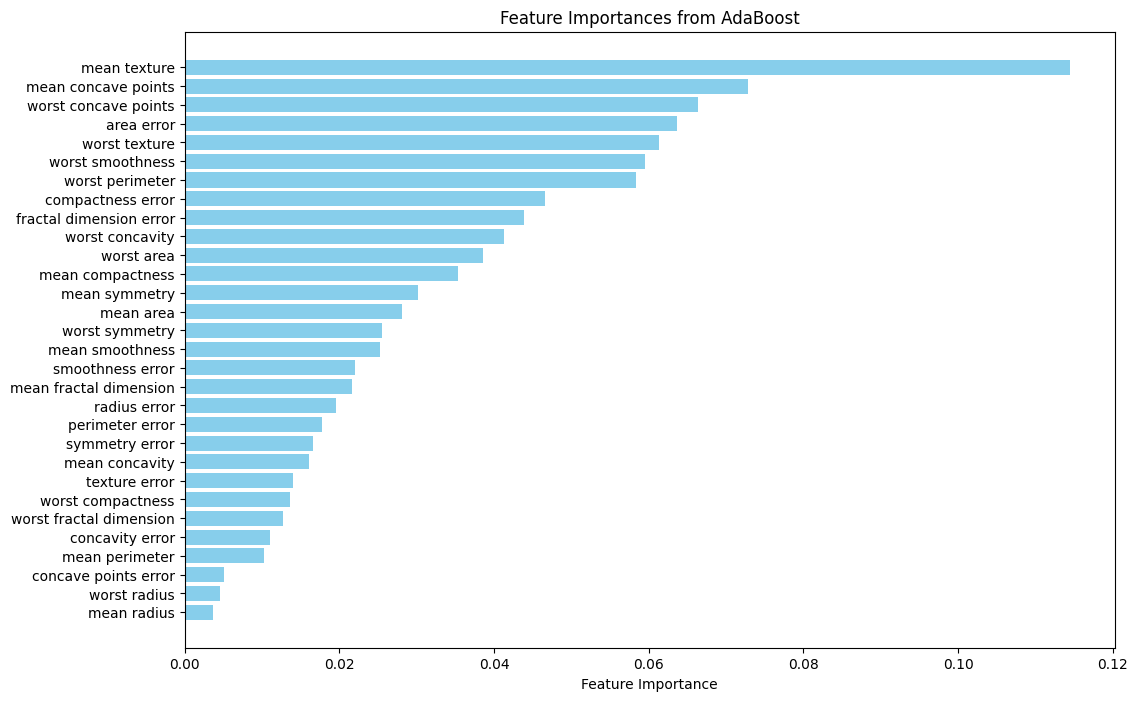

In [48]:
# Visualize feature importances from AdaBoost
plt.figure(figsize=(12, 8))
plt.barh(sorted_importances.index, sorted_importances.values, color='skyblue')
plt.xlabel("Feature Importance")
plt.title("Feature Importances from AdaBoost")
plt.show()  

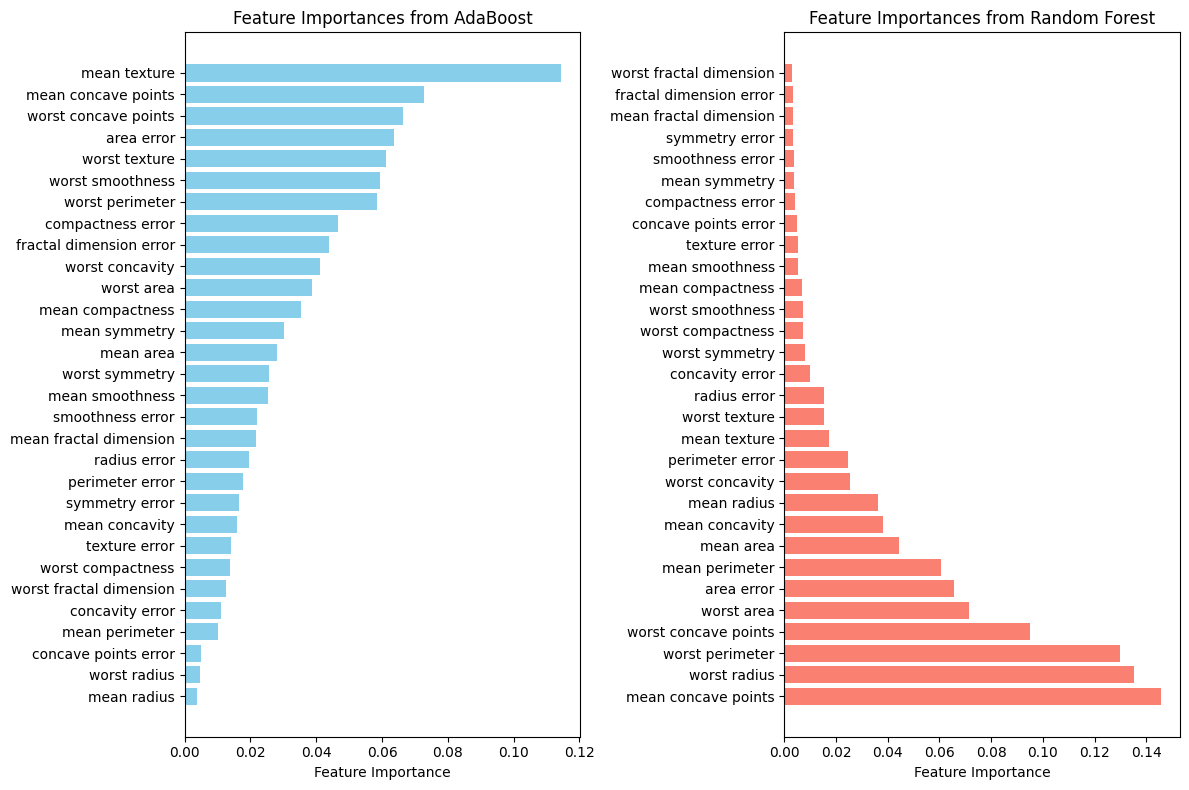

In [49]:
# Visualize features importances from AdaBoost and Random Forest
plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.barh(sorted_importances.index, sorted_importances.values, color='skyblue')
plt.xlabel("Feature Importance")
plt.title("Feature Importances from AdaBoost")

plt.subplot(1, 2, 2)
plt.barh(importance_df['Feature'], importance_df['Importance'], color='salmon')
plt.xlabel("Feature Importance")
plt.title("Feature Importances from Random Forest")

plt.tight_layout()
plt.show()

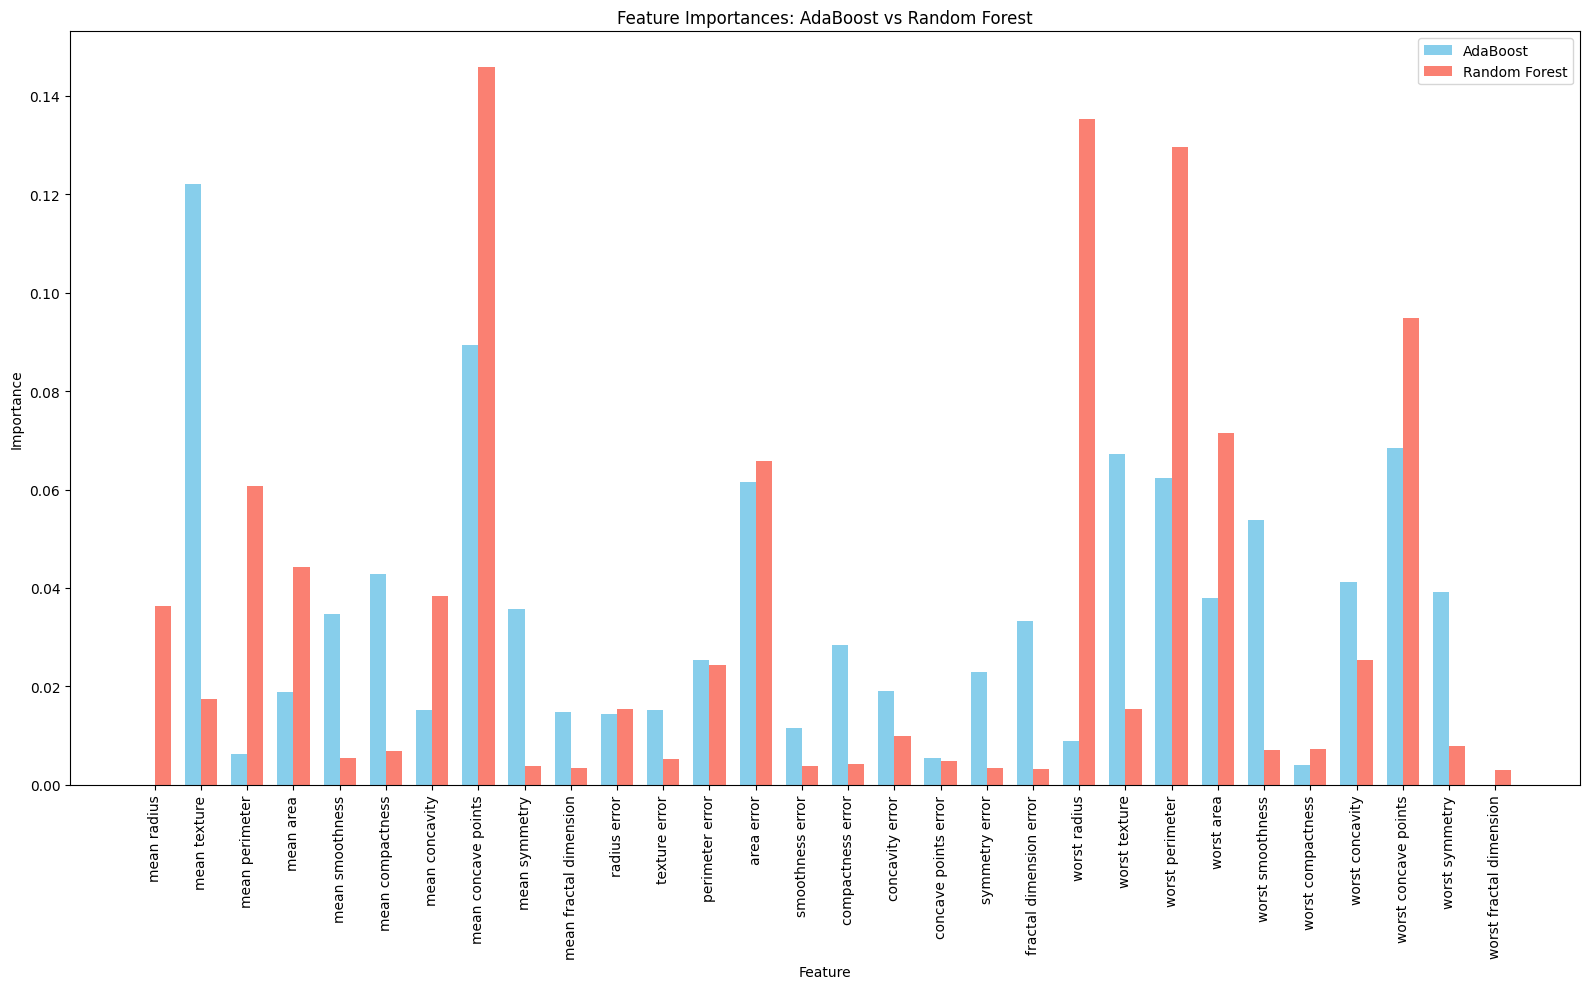

In [38]:
# Prepare data for side-by-side bar plot
features = X.columns
ada_importances = feature_importances_series.loc[features].values
rf_importances = importance_df.set_index('Feature').loc[features]['Importance'].values

x = np.arange(len(features))
width = 0.35

plt.figure(figsize=(16, 10))
plt.bar(x - width/2, ada_importances, width, label='AdaBoost', color='skyblue')
plt.bar(x + width/2, rf_importances, width, label='Random Forest', color='salmon')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances: AdaBoost vs Random Forest')
plt.xticks(x, features, rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

From this plot above, we can see that the two ensambling models, Adaboost and Random Forest, estimate different importances for the differrent features in predicting the outcome. Especially for 'mean texture' and 'worst radius'. let's look at their correlation

In [50]:
# Compute the correlation between 'mean texture' and 'worst radius'
mean_texture = X['mean texture']
worst_radius = X['worst radius']
correlation = np.corrcoef(mean_texture, worst_radius)[0, 1]
print(f"Correlation between 'mean texture' and 'worst radius': {correlation:.4f}")

Correlation between 'mean texture' and 'worst radius': 0.3526


They're not so highly correlated to allow saying that they get swapped by the two methods.

In [51]:
# Compare the three models
print(f"Random Forest Test Accuracy: {rf_accuracy:.4f}")
print(f"AdaBoost Test Accuracy: {ada_accuracy:.4f}")
print(f"Decision Tree Test Accuracy: {tree_accuracy:.4f}")

Random Forest Test Accuracy: 0.9474
AdaBoost Test Accuracy: 0.9649
Decision Tree Test Accuracy: 0.9035


Overall, looking at the accuracy, we can see that the best performing method is AdaBoost, followed by Random Forest. It would be interesting to repeat this estimation procedure many many times, and see what happens on average over many test sets. 

It would also be interesting to investigate the impact of the hyper parameters, such as Number of Estimators, or max_depth of the trees. 

# Comparison of Random Forest and AdaBoost over multiple splits of the data

In [52]:
from sklearn.model_selection import StratifiedShuffleSplit

n_runs = 50
rf_accuracies = []
ada_accuracies = []

sss = StratifiedShuffleSplit(n_splits=n_runs, test_size=0.2, random_state=1342)

for train_idx, test_idx in sss.split(X, y):
    X_train_cv, X_test_cv = X.iloc[train_idx], X.iloc[test_idx]
    y_train_cv, y_test_cv = y.iloc[train_idx], y.iloc[test_idx]

    rf = RandomForestClassifier(random_state=1342, n_estimators=100)
    rf.fit(X_train_cv, y_train_cv)
    rf_pred = rf.predict(X_test_cv)
    rf_accuracies.append(accuracy_score(y_test_cv, rf_pred))

    ada = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=2), n_estimators=100, random_state=1342)
    ada.fit(X_train_cv, y_train_cv)
    ada_pred = ada.predict(X_test_cv)
    ada_accuracies.append(accuracy_score(y_test_cv, ada_pred))

print(f"Random Forest average accuracy over {n_runs} runs: {np.mean(rf_accuracies):.4f} ± {np.std(rf_accuracies):.4f}")
print(f"AdaBoost average accuracy over {n_runs} runs: {np.mean(ada_accuracies):.4f} ± {np.std(ada_accuracies):.4f}")

Random Forest average accuracy over 50 runs: 0.9609 ± 0.0176
AdaBoost average accuracy over 50 runs: 0.9682 ± 0.0148


Over many data splits (50), we can see that in reality the difference between random forest and adaboost is much less relevant (not statistically significant). However, both have pretty stable performances given the small standard errors. 

# Comparison of different hyper parameters for AdaBoost

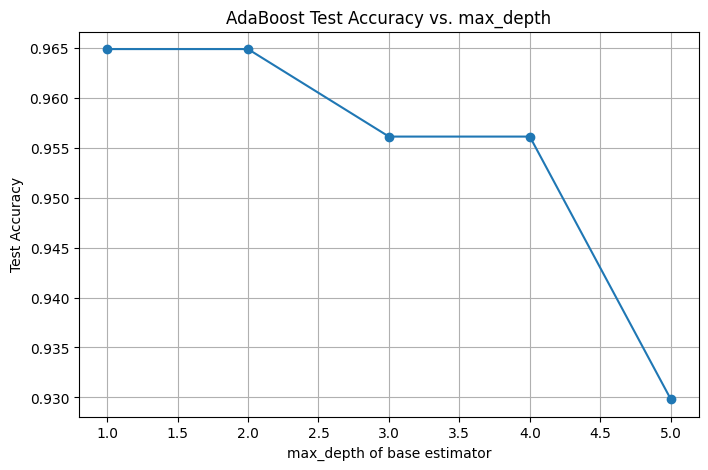

In [53]:
from sklearn.metrics import accuracy_score

# Try different max_depth values for the base estimator in AdaBoost
max_depths = [1, 2, 3, 4, 5]
ada_depth_accuracies = []

for depth in max_depths:
    ada = AdaBoostClassifier(
        estimator=DecisionTreeClassifier(max_depth=depth),
        n_estimators=100,
        random_state=1342
    )
    ada.fit(X_train, y_train)
    preds = ada.predict(X_test)
    acc = accuracy_score(y_test, preds)
    ada_depth_accuracies.append(acc)

# Plot the results
plt.figure(figsize=(8, 5))
plt.plot(max_depths, ada_depth_accuracies, marker='o')
plt.xlabel('max_depth of base estimator')
plt.ylabel('Test Accuracy')
plt.title('AdaBoost Test Accuracy vs. max_depth')
plt.grid(True)
plt.show()

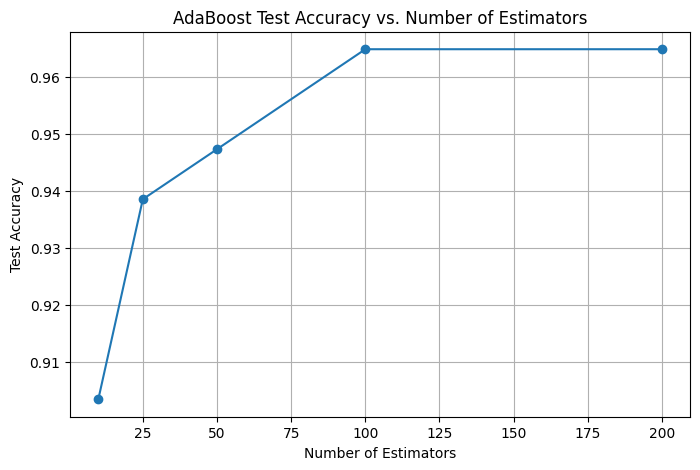

In [54]:
from sklearn.metrics import accuracy_score

# Try different max_depth values for the base estimator in AdaBoost
num_estimators = [10, 25, 50 , 100, 200]
ada_num_estimators_accuracies = []

for n_estimators in num_estimators:
    ada = AdaBoostClassifier(
        estimator=DecisionTreeClassifier(max_depth=1),
        n_estimators=n_estimators,
        random_state=1342
    )
    ada.fit(X_train, y_train)
    preds = ada.predict(X_test)
    acc = accuracy_score(y_test, preds)
    ada_num_estimators_accuracies.append(acc)

# Plot the results
plt.figure(figsize=(8, 5))
plt.plot(num_estimators, ada_num_estimators_accuracies, marker='o')
plt.xlabel('Number of Estimators')
plt.ylabel('Test Accuracy')
plt.title('AdaBoost Test Accuracy vs. Number of Estimators')
plt.grid(True)
plt.show()